# Musics Dataset EDA

* Author: Alperen Demirci [LinkedIn](https://www.linkedin.com/in/alperendemirci)

* This notebook is an exploratory data analysis of the Musics dataset. The dataset contains information about the music tracks, lyrics, artists and genres.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('data/anon_disorder_musics.csv')

In [3]:
data.head()

,Unnamed: 0,artist,lyric,created_at,type,title,user_id,src,disorder
0,0,Echo & the Bunnymen,[Verse 1]\nUnder blue moon I saw you\nSo soon ...,Wed Jan 13 01:02:45 +0000 2021,P,The Killing Moon,4353e884c1,SPOTIFY,anxiety
1,1,Paul McCartney,NaN,Wed Jan 13 01:02:45 +0000 2021,P,Monkberry Moon Delight - Remastered 2012,4353e884c1,SPOTIFY,anxiety
2,2,Turin Brakes,"Oooh, oooh, oooh (x2)\nSometimes just letting ...",Wed Jan 13 01:02:45 +0000 2021,P,Red Moon,4353e884c1,SPOTIFY,anxiety
3,3,Damon Albarn,NaN,Wed Jan 13 01:02:45 +0000 2021,P,"Damon Albarn: Dr Dee, An English Opera: No. 4,...",4353e884c1,SPOTIFY,anxiety
4,4,Radiohead,[Verse 1]\nI sucked the moon\nI spoke too soon...,Wed Jan 13 01:02:45 +0000 2021,P,Sail To The Moon,4353e884c1,SPOTIFY,anxiety


In [4]:
all(data['Unnamed: 0']==data.index)

True

* We can drop the 'Unnamed: 0' column since it is same as the index column.

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.columns

Index(['artist', 'lyric', 'created_at', 'type', 'title', 'user_id', 'src',
       'disorder'],
      dtype='object')

## Columns

* ['artist', 'lyric', 'created_at', 'type', 'title', 'user_id', 'src', 'disorder']

       * artist: Name of the artist
       * lyric: Lyrics of the music
       * created_at: Date of the creation
       * type: Type of the music
       * title: Title of the music
       * user_id: User id
       * src: Source of the music
       * disorder: Disorder of the music

## Target

* We will use the 'disorder' column as the target column. 





Let's check our data distributions and relationships between the features.


In [7]:
data.describe()

,artist,lyric,created_at,type,title,user_id,src,disorder
count,396770,311568,396842,396842,396837,396842,396842,396842
unique,36726,119117,44806,3,127805,5009,3,6
top,BTS,[Verse 1]\nI just cried into a shirt I could n...,Mon Mar 30 21:35:00 +0000 2020,P,Lowkey As Hell,eeb72fcca6,SPOTIFY,depression
freq,14237,1494,800,258032,2862,5028,320402,180386


In [8]:
data.isna().sum()

artist           72
lyric         85274
created_at        0
type              0
title             5
user_id           0
src               0
disorder          0
dtype: int64

In [9]:
len(data)

396842

* We need to handle the empty lyrics because because we can not use them with our models. We can drop them or fill them with a special value.

* Empty values in artists and titles are not a problem because we may not use them in our models.

* Now we need to check the distribution of our attributes.

In [10]:
for col in data.columns:
    print(col, data[col].value_counts().shape[0])

artist 36726
lyric 119117
created_at 44806
type 3
title 127805
user_id 5009
src 3
disorder 6


In [11]:
data['disorder'].value_counts()

disorder
depression    180386
anxiety        97325
ptsd           66366
bipolar        35732
borderline     12000
panic           5033
Name: count, dtype: int64

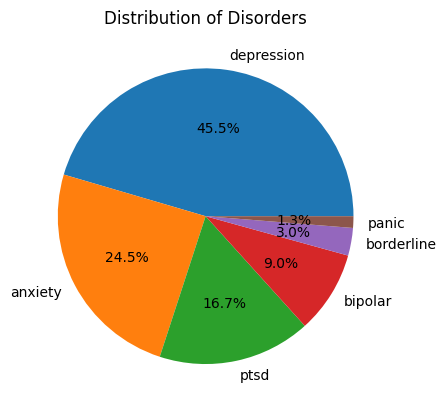

In [12]:
plt.pie(data['disorder'].value_counts(), labels=['depression', 'anxiety', 'ptsd', 'bipolar', 'borderline','panic'], autopct='%1.1f%%')
plt.title('Distribution of Disorders')
plt.show()

In [13]:
data['title'].value_counts()

title
Lowkey As Hell                                                                              2862
Nice To Meet Ya                                                                             1949
Dynamite                                                                                    1440
Life Goes On                                                                                1263
Nice To Meet Ya - Stripped Version                                                           530
                                                                                            ... 
PM TO THE AM                                                                                   1
K.O                                                                                            1
coffee on the beach.                                                                           1
Moskau                                                                                         1
24 Hours x Gypsy Woman (

In [14]:
freq_titles = data['title'].value_counts()[data['title'].value_counts()>100]

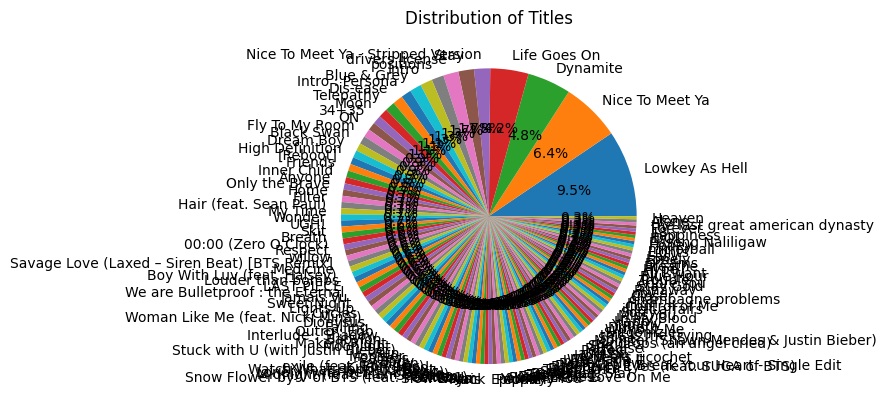

In [15]:
plt.pie(freq_titles, labels=freq_titles.index, autopct='%1.1f%%')
plt.title('Distribution of Titles')
plt.show()

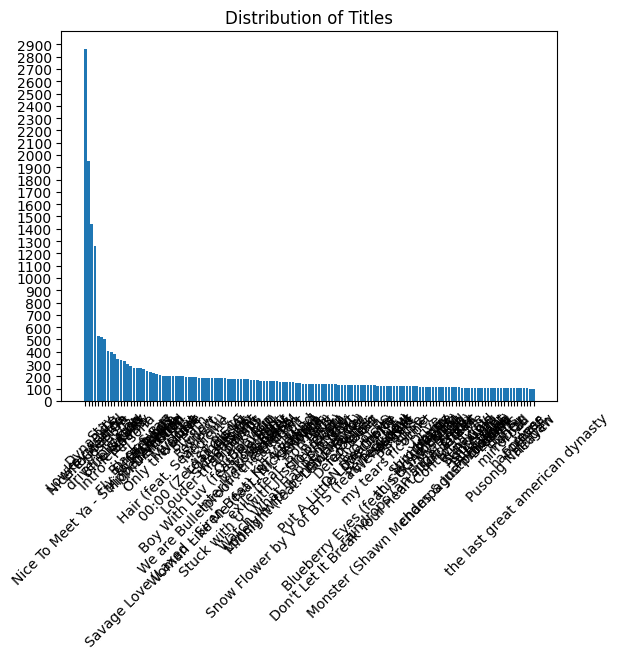

In [16]:
plt.bar(freq_titles.index, freq_titles)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 3000, 100))
plt.title('Distribution of Titles')
plt.show()

* As seen, some of the music exist more than others. Especially, the the musics with a count of 300 and more. Musics which has a count lower than 300 are distributed equally, which is a good thing for us.

* Let's check the distribution of some musics with a high count.

In [17]:
top_freq_titles = freq_titles[freq_titles>=300]

In [18]:
top_freq_titles

title
Lowkey As Hell                        2862
Nice To Meet Ya                       1949
Dynamite                              1440
Life Goes On                          1263
Nice To Meet Ya - Stripped Version     530
Stay                                   518
drivers license                        502
positions                              403
Intro                                  402
Blue & Grey                            384
Intro : Persona                        341
Dis-ease                               334
Telepathy                              325
Moon                                   301
Name: count, dtype: int64

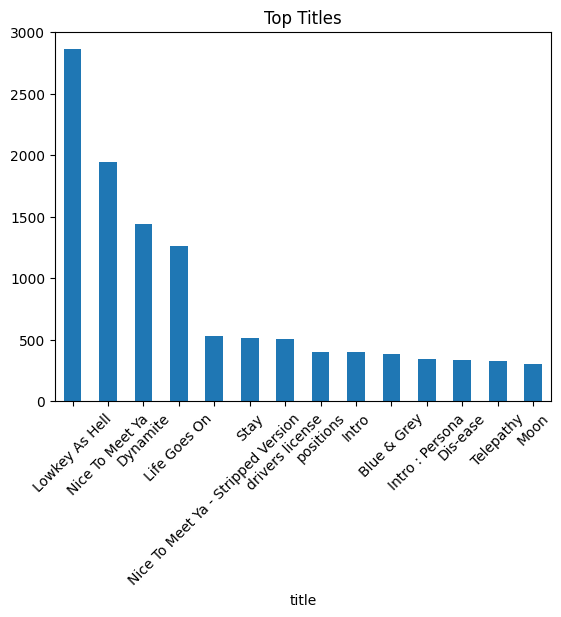

In [19]:
top_freq_titles.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top Titles')
plt.show()

* We have some musics which do not have titles and they are encoded as " ". Which breaks our distribution and makes it harder to interpret. We can drop them or fill them with a special value.

* Let's check if these musics have a spesific imbalance towards a disorder.

### Distribution of the length of the lyrics

- Maybe the length of the lyrics can be a good feature for our models. Let's check the distribution of the length of the lyrics.

In [20]:
data['len_lyric'] = data['lyric'].str.len()

data['len_lyric'].describe()

count    311568.000000
mean       1760.337329
std        1775.653205
min          20.000000
25%        1140.000000
50%        1590.000000
75%        2148.000000
max      457428.000000
Name: len_lyric, dtype: float64

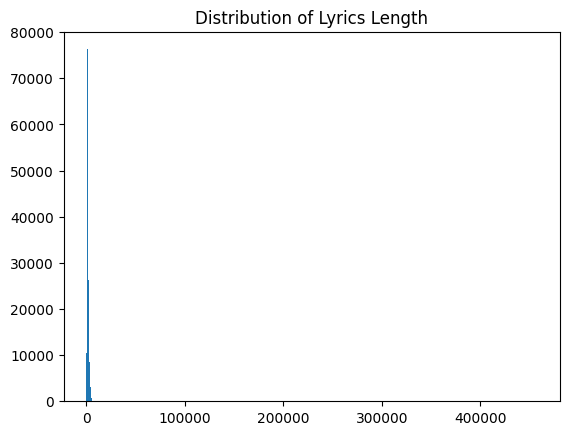

In [21]:
plt.hist(data['len_lyric'], bins=1000)
plt.title('Distribution of Lyrics Length')
plt.show()

In [22]:
data['len_lyric'].sort_values(ascending=False).head(50)

294606    457428.0
294603    457428.0
126110    158487.0
127457    130598.0
277717    107541.0
278359    107541.0
278253    107541.0
288845    107449.0
289584    107449.0
289638    107449.0
223606     93356.0
19232      86173.0
333731     85757.0
396686     79386.0
29008      79311.0
32811      68431.0
129103     68115.0
269361     65681.0
177854     65469.0
177754     65469.0
257859     65468.0
29767      63772.0
29783      63772.0
29959      63772.0
14378      63772.0
14362      63772.0
14054      63772.0
29598      63772.0
14247      63772.0
29566      63772.0
29390      63772.0
129112     63734.0
29518      63400.0
28861      63400.0
28936      63400.0
29291      63400.0
29502      63400.0
29534      63400.0
29799      63400.0
29550      63400.0
29582      63400.0
29975      63400.0
29910      63400.0
29815      63400.0
29156      63400.0
246216     49574.0
128209     49407.0
128184     49198.0
128178     49198.0
128203     49198.0
Name: len_lyric, dtype: float64

* The distribution of lyrics become normal after dropping the lyrics with a length over 5000. 
* This is because there some lots of wrong lyrics which are not lyrics but some other text. We can drop them or fill them with a special value.



In [23]:
data = data[data['len_lyric']<5000]

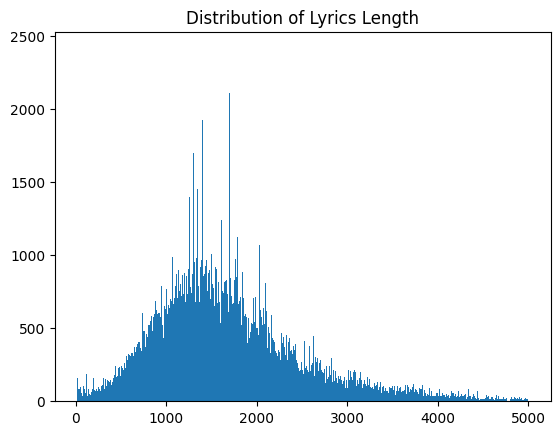

In [24]:
plt.hist(data['len_lyric'], bins=1000)
plt.title('Distribution of Lyrics Length')
plt.show()

In [25]:
IQR = data['len_lyric'].quantile(0.75) - data['len_lyric'].quantile(0.25)
UPPER = data['len_lyric'].quantile(0.75) + 1.5*IQR
LOWER = data['len_lyric'].quantile(0.25) - 1.5*IQR

print(data['len_lyric'].quantile(0.25), data['len_lyric'].quantile(0.75), UPPER, LOWER)

## Outliers
print(data[data['len_lyric']>UPPER].shape[0], data[data['len_lyric']<LOWER].shape[0])

1137.0 2132.0 3624.5 -355.5
11061 0


In [26]:
data[(data['len_lyric']<UPPER) & (data['len_lyric']>LOWER)].shape

(298476, 9)

* Just by removing the necessary lyrics, we drop %25 of the data which is a lot. This means that our data is messy.

* Let's check if we have a significance between our classes and this feature.

In [27]:
data.groupby('disorder')['len_lyric'].describe()

,count,mean,std,min,25%,50%,75%,max
disorder,,,,,,,,
anxiety,79598.0,1736.009246,831.850985,20.0,1168.0,1615.0,2152.0,4999.0
bipolar,25743.0,1710.369265,890.431385,20.0,1089.5,1563.0,2188.5,4992.0
borderline,9531.0,1654.024971,794.986916,20.0,1107.0,1513.0,2059.0,4957.0
depression,144794.0,1699.118506,825.089652,20.0,1150.0,1582.0,2101.0,4997.0
panic,3888.0,1688.344907,874.011515,25.0,1075.0,1505.5,2103.0,4940.0
ptsd,45983.0,1741.579866,910.603174,20.0,1086.0,1567.0,2219.0,4999.0


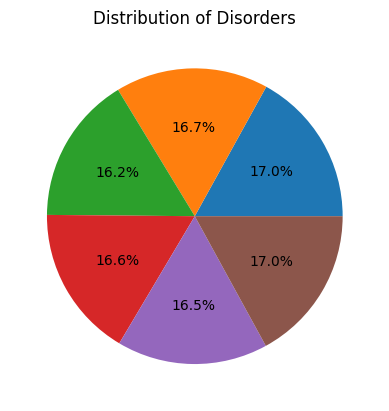

In [28]:
plt.pie(data.groupby('disorder')['len_lyric'].mean(), autopct='%1.1f%%')
plt.title('Distribution of Disorders')
plt.show()

* There exist no significant difference between the classes and the length of the lyrics. This means that we can not use this feature as a good feature for our models.

* However, this information is valuable for us while sampling the data.

### Top 5 artists per every class

In [29]:
data.groupby('disorder')['artist'].nunique()

disorder
anxiety        9101
bipolar        4589
borderline     2803
depression    13732
panic          1554
ptsd           8089
Name: artist, dtype: int64

In [30]:
# Assuming 'data' is your DataFrame
top_5_artists_per_disorder = (
    data.groupby('disorder')['artist']
    .value_counts()
    .groupby(level=0)
    .head(5)
)

print(top_5_artists_per_disorder)


disorder    artist             
anxiety     BTS                    3646
            Taylor Swift           2364
            Ariana Grande          1630
            Louis Tomlinson        1279
            5 Seconds of Summer     835
bipolar     i_o                     401
            ARTY                    271
            BTS                     251
            Drake                   250
            Taylor Swift            218
borderline  BTS                     555
            Taylor Swift            340
            TOMORROW X TOGETHER      67
            Evanescence              65
            Linkin Park              63
depression  BTS                    6327
            Waterparks             3852
            Taylor Swift           2993
            Niall Horan            2723
            One Direction          1807
panic       BTS                     157
            Linkin Park              86
            Taylor Swift             51
            VIXX                     44
        

* We can see that BTS is on top in every disorder. This can be BTS is one of the most listened group in the entire list. 